In [1]:
from character_embeddings import CharacterEmbeddings
from model import GermanHateSpeechModel
import pandas as pd
import os
from tqdm import tqdm
import torch
import numpy as np
from fuzzywuzzy import fuzz

In [2]:
def jaccard_similarity(A, B):
    #Find intersection of two sets
    nominator = A.intersection(B)

    #Find union of two sets
    denominator = A.union(B)

    #Take the ratio of sizes
    similarity = len(nominator)/len(denominator)
    
    return similarity


In [7]:
basepath = "./datasets"
results = []
for filename in tqdm(os.listdir(f"{basepath}")):
    ds = "hasoc"
    if "defense" in filename and "whitebox" in filename  and "summary" not in filename:
        path = f"{basepath}/{filename}"
        dataset = pd.read_csv(path)
        
        perturbed_jaccard, defended_jaccard = [], []
        
        for idx,row in dataset.iterrows():
            original_text, perturbed_text, defended_text = (row['original_text'].lower(), 
                                                            row['perturbed_text'].lower(), row['defended_text'].lower())
            
            #print(">>>>>>>>>>")
            #print(original_text)
            #print(perturbed_text)
            #print(defended_text)
            #print("<<<<<<<<<<")
            perturbed_jaccard.append(jaccard_similarity(set(original_text.split(" ")), set(perturbed_text.split(" "))))
            defended_jaccard.append(jaccard_similarity(set(original_text.split(" ")), set(defended_text.split(" "))))
        if "germeval" in filename:
            ds="germeval"
        results.append({
                        "jaccard_similarity":np.median(perturbed_jaccard), 
                        "dataset": f"{ds}",
                        "evaluation_type": "perturbed",
                        "adverserial_source": filename 
                       })
        results.append({
                         "jaccard_similarity":np.median(defended_jaccard),
                        "dataset": f"{ds}",
            "evaluation_type": "defended",
                        "adverserial_source": filename 
                       })
       

100%|██████████| 10/10 [00:00<00:00, 65.01it/s]


In [8]:
df = pd.DataFrame(results)

In [9]:
#res = df[["perturbed_jaccard_mean","defended_jaccard_median"]].values
df

,jaccard_similarity,dataset,evaluation_type,adverserial_source
0,0.764706,germeval,perturbed,results-germeval_whitebox_charlevel_attack_def...
1,0.909091,germeval,defended,results-germeval_whitebox_charlevel_attack_def...
2,0.529412,hasoc,perturbed,results-hasoc_whitebox_charlevel_attack_defens...
3,0.228571,hasoc,defended,results-hasoc_whitebox_charlevel_attack_defens...


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import seaborn as sns
from scipy import stats

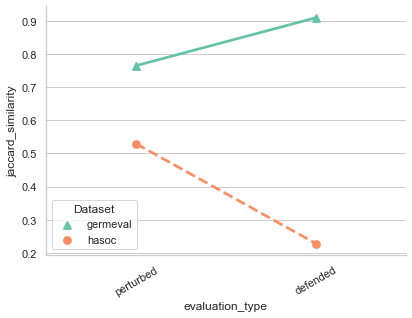

In [15]:
a4_dims = (10, 8)
plt.rcParams.update({'font.size': 19})
#fig, ax = plt.subplots(figsize=a4_dims)
#plt.ylim(0.2, 0.95)
#ax.tick_params(axis='x', rotation=16)
#ax.tick_params(axis='x', rotation=16)
#sns.barplot(ax=ax, x="evaluation_type", y="jaccard_similarity",hue="dataset" ,data=df);
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = 42,33.27
g = sns.catplot(x="evaluation_type", y="jaccard_similarity", hue="dataset",markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=df, legend=False,palette="Set2",height=4.27, aspect=5.7/4.27 )#height=8.27, aspect=11.7/8.27
g.set_xticklabels(rotation=30)
plt.legend(title='Dataset', loc='lower left')
plt.subplots_adjust(bottom=0.15)
plt.savefig("evaluation_type.pdf",dpi=300, bbox_inches = "tight")
#plt.savefig("perturbed_defended_jaccard.pdf")